In [1]:
import os
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import InputLayer,Conv2D, MaxPool2D, Dropout, Flatten, Dense, BatchNormalization,Resizing, Rescaling
from tensorflow.keras.layers import RandomRotation, RandomFlip, RandomContrast, RandomZoom, GaussianNoise
from tensorflow.keras.regularizers import L2
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import CategoricalAccuracy, TopKCategoricalAccuracy



In [2]:
import tensorflow_probability as tfp


In [9]:
!unzip TeethDataSet.zip -d /content/


Streaming output truncated to the last 5000 lines.
  inflating: /content/Teeth DataSet/Teeth_Dataset/Testing/CoS/b_101_0_8008.jpg  
  inflating: /content/Teeth DataSet/Teeth_Dataset/Testing/CoS/b_102_0_9725.jpg  
  inflating: /content/Teeth DataSet/Teeth_Dataset/Testing/CoS/b_102_0_9936.jpg  
  inflating: /content/Teeth DataSet/Teeth_Dataset/Testing/CoS/b_104.jpg  
  inflating: /content/Teeth DataSet/Teeth_Dataset/Testing/CoS/b_104_0_40.jpg  
  inflating: /content/Teeth DataSet/Teeth_Dataset/Testing/CoS/b_105_0_1905.jpg  
  inflating: /content/Teeth DataSet/Teeth_Dataset/Testing/CoS/b_105_0_6014.jpg  
  inflating: /content/Teeth DataSet/Teeth_Dataset/Testing/CoS/b_106_0_2133.jpg  
  inflating: /content/Teeth DataSet/Teeth_Dataset/Testing/CoS/b_106_0_5505.jpg  
  inflating: /content/Teeth DataSet/Teeth_Dataset/Testing/CoS/b_107_0_1494.jpg  
  inflating: /content/Teeth DataSet/Teeth_Dataset/Testing/CoS/b_107_0_3779.jpg  
  inflating: /content/Teeth DataSet/Teeth_Dataset/Testing/CoS/b_107

# Load Data

In [10]:
train_directory="/content/Teeth DataSet/Teeth_Dataset/Training"
validation_directory="/content/Teeth DataSet/Teeth_Dataset/Validation"
test_directory="/content/Teeth DataSet/Teeth_Dataset/Testing"

CLASS_NAMES=['CaS','CoS','Gum','MC','OC','OLP','OT']

CONFIGURATION= {
    "BATCH_SIZE": 32,
    "IM_SIZE": 256,
    "LEARNING_RATE":0.001,
    "N_EPOCHS":20,
    "DROPOUT_RATE":0.1,
    "REGULARIZATION_RATE":0.001,
    "N_FILTERS":6,
    "KERNEL_SIZE":3,
    "N_STRIDES":1,
    "POOL_SIZE":2,
    "N_DENSE_1":100,
    "N_DENSE_2":10,
    "NUM_CLASSES":7,

}

In [11]:
train_dataset= tf.keras.preprocessing.image_dataset_from_directory(
    train_directory,
    labels='inferred',
    label_mode='categorical', # ex: 0,0,1 called one-hot encoding
    class_names=CLASS_NAMES,
    color_mode='rgb',
    batch_size=CONFIGURATION["BATCH_SIZE"],
    image_size=(256, 256),
    shuffle=True,
    seed=99, #Spicified it to alweys same shuffling
    validation_split=None,

)

Found 3087 files belonging to 7 classes.


In [12]:
validation_dataset= tf.keras.preprocessing.image_dataset_from_directory(
    validation_directory,
    labels='inferred',
    label_mode='categorical', # ex: 0,0,1 called one-hot encoding
    class_names=CLASS_NAMES,
    color_mode='rgb',
    batch_size=CONFIGURATION["BATCH_SIZE"],
    image_size=(CONFIGURATION["IM_SIZE"], CONFIGURATION["IM_SIZE"]),
    shuffle=True,
    seed=99, #Spicified it to alweys same shuffling

)

Found 1028 files belonging to 7 classes.


In [13]:
test_dataset= tf.keras.preprocessing.image_dataset_from_directory(
    test_directory,
    labels='inferred',
    label_mode='categorical', # ex: (0,0,1) called one-hot encoding, many traditional neural network architectures are designed to work with one-hot encoded vectors.
    class_names=CLASS_NAMES,
    color_mode='rgb',
    batch_size=CONFIGURATION["BATCH_SIZE"],
    image_size=(CONFIGURATION["IM_SIZE"], CONFIGURATION["IM_SIZE"]),
    shuffle=True,
    seed=99, #Spicified it to alweys same shuffling

)

Found 1028 files belonging to 7 classes.


In [14]:
for i in validation_dataset.take(1):
    print(i)

(<tf.Tensor: shape=(32, 256, 256, 3), dtype=float32, numpy=
array([[[[201., 113.,  93.],
         [202., 114.,  94.],
         [204., 116.,  96.],
         ...,
         [236., 126., 101.],
         [236., 126., 101.],
         [236., 126., 101.]],

        [[201., 113.,  93.],
         [202., 114.,  94.],
         [204., 116.,  96.],
         ...,
         [237., 127., 102.],
         [237., 127., 102.],
         [237., 127., 102.]],

        [[201., 113.,  93.],
         [202., 114.,  94.],
         [203., 115.,  95.],
         ...,
         [239., 129., 104.],
         [239., 129., 104.],
         [239., 129., 104.]],

        ...,

        [[  3.,   4.,   0.],
         [  3.,   4.,   0.],
         [  3.,   4.,   0.],
         ...,
         [131.,  44.,  37.],
         [130.,  43.,  36.],
         [130.,  43.,  36.]],

        [[  3.,   4.,   0.],
         [  3.,   4.,   0.],
         [  3.,   4.,   0.],
         ...,
         [130.,  43.,  36.],
         [130.,  43.,  36.],
       

# Data Distribution

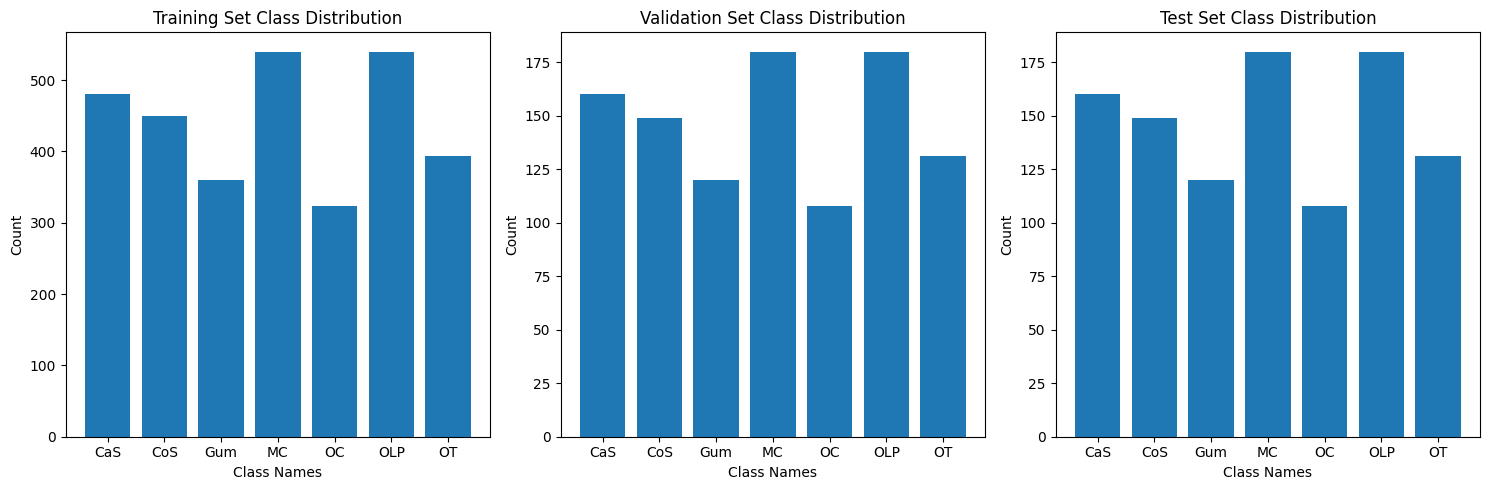

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

# Define a function to calculate the distribution of classes
def get_class_distribution(dataset, class_names):
    class_counts = np.zeros(len(class_names))
    for images, labels in dataset:
        class_counts += np.sum(labels, axis=0)
    return class_counts

# Get class distributions for training, validation, and test datasets
train_class_counts = get_class_distribution(train_dataset, CLASS_NAMES)
validation_class_counts = get_class_distribution(validation_dataset, CLASS_NAMES)
test_class_counts = get_class_distribution(test_dataset, CLASS_NAMES)

# Plot the class distributions
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.bar(CLASS_NAMES, train_class_counts)
plt.title('Training Set Class Distribution')
plt.xlabel('Class Names')
plt.ylabel('Count')

plt.subplot(1, 3, 2)
plt.bar(CLASS_NAMES, validation_class_counts)
plt.title('Validation Set Class Distribution')
plt.xlabel('Class Names')
plt.ylabel('Count')

plt.subplot(1, 3, 3)
plt.bar(CLASS_NAMES, test_class_counts)
plt.title('Test Set Class Distribution')
plt.xlabel('Class Names')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


In [16]:
print("Training Set Class Distribution:")
for class_name, count in zip(CLASS_NAMES, train_class_counts):
    print(f"{class_name}: {int(count)} images")

print("\nValidation Set Class Distribution:")
for class_name, count in zip(CLASS_NAMES, validation_class_counts):
    print(f"{class_name}: {int(count)} images")

print("\nTest Set Class Distribution:")
for class_name, count in zip(CLASS_NAMES, test_class_counts):
    print(f"{class_name}: {int(count)} images")

Training Set Class Distribution:
CaS: 480 images
CoS: 450 images
Gum: 360 images
MC: 540 images
OC: 324 images
OLP: 540 images
OT: 393 images

Validation Set Class Distribution:
CaS: 160 images
CoS: 149 images
Gum: 120 images
MC: 180 images
OC: 108 images
OLP: 180 images
OT: 131 images

Test Set Class Distribution:
CaS: 160 images
CoS: 149 images
Gum: 120 images
MC: 180 images
OC: 108 images
OLP: 180 images
OT: 131 images


# Data visualization

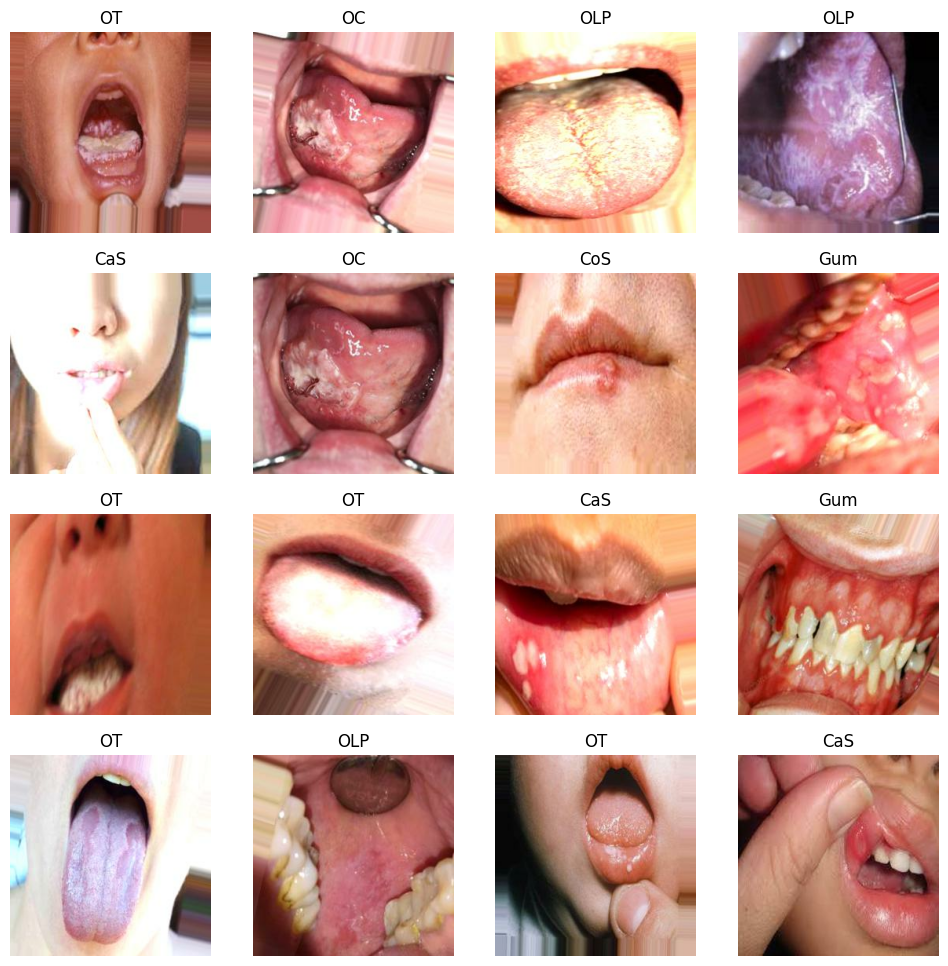

In [17]:
plt.figure(figsize=(12,12))
for images, labels in train_dataset.take(1):
    for i in range(16):
        ax=plt.subplot(4,4,i+1)
        plt.imshow(images[i]/255.)
        plt.title(CLASS_NAMES[tf.argmax(labels[i],axis=0).numpy()])
        plt.axis("off")

In [18]:
def resize_rescale(image,label):
    return tf.image.resize(image,(CONFIGURATION["IM_SIZE"],CONFIGURATION["IM_SIZE"]))/255.0,label

# Data Augmentation

In [19]:
augment_layers = tf.keras.Sequential([
    tf.keras.layers.RandomRotation((-0.025, 0.025)),
    tf.keras.layers.GaussianNoise(0.1),
    tf.keras.layers.RandomContrast(factor=0.2),
    tf.keras.layers.RandomZoom(0.2),
    tf.keras.layers.RandomBrightness(0.2)
])


In [20]:

def augment_layer(image,label):
    return augment_layers(image,training=True),label

# Data preparation

In [21]:
training_dataset=(
train_dataset
.map(augment_layer, num_parallel_calls=tf.data.AUTOTUNE)
.prefetch(tf.data.AUTOTUNE)
)



In [22]:
val_datset=(
validation_dataset
.prefetch(tf.data.AUTOTUNE)
)


In [23]:
testing_datset=(
test_dataset
.prefetch(tf.data.AUTOTUNE)
)


In [ ]:
# Resizing(CONFIGURATION["IM_SIZE"],CONFIGURATION["IM_SIZE"]),
   # Rescaling(1./255, name="rescaling"),


# Modeling

In [24]:
from tensorflow.keras.layers import LeakyReLU, Dropout, InputLayer, Resizing, Rescaling, Conv2D, BatchNormalization, MaxPool2D, GlobalAveragePooling2D, Flatten, Dense
from tensorflow.keras.regularizers import L2
import tensorflow as tf

model = tf.keras.Sequential([
    InputLayer(input_shape=(None, None, 3)),
    Resizing(CONFIGURATION["IM_SIZE"], CONFIGURATION["IM_SIZE"]),
    Rescaling(1./255, name="rescaling"),

    Conv2D(filters=CONFIGURATION["N_FILTERS"], kernel_size=CONFIGURATION["KERNEL_SIZE"], strides=CONFIGURATION["N_STRIDES"], padding='valid',
           kernel_regularizer=L2(CONFIGURATION["REGULARIZATION_RATE"])),
    BatchNormalization(),
    LeakyReLU(alpha=0.1),
    MaxPool2D(pool_size=CONFIGURATION["POOL_SIZE"], strides=CONFIGURATION["N_STRIDES"] * 2),
    Dropout(rate=CONFIGURATION["DROPOUT_RATE"]),

    Conv2D(filters=CONFIGURATION["N_FILTERS"] * 2, kernel_size=CONFIGURATION["KERNEL_SIZE"], strides=CONFIGURATION["N_STRIDES"], padding='valid',
           kernel_regularizer=L2(CONFIGURATION["REGULARIZATION_RATE"])),
    BatchNormalization(),
    LeakyReLU(alpha=0.1),
    MaxPool2D(pool_size=2, strides=2),
    Dropout(rate=CONFIGURATION["DROPOUT_RATE"]),

    Conv2D(filters=CONFIGURATION["N_FILTERS"] * 4, kernel_size=CONFIGURATION["KERNEL_SIZE"], strides=CONFIGURATION["N_STRIDES"], padding='valid',
           kernel_regularizer=L2(CONFIGURATION["REGULARIZATION_RATE"])),
    BatchNormalization(),
    LeakyReLU(alpha=0.1),
    MaxPool2D(pool_size=2, strides=2),
    Dropout(rate=CONFIGURATION["DROPOUT_RATE"]),

    Conv2D(filters=CONFIGURATION["N_FILTERS"] * 8, kernel_size=CONFIGURATION["KERNEL_SIZE"], strides=CONFIGURATION["N_STRIDES"], padding='valid',
           kernel_regularizer=L2(CONFIGURATION["REGULARIZATION_RATE"])),
    BatchNormalization(),
    LeakyReLU(alpha=0.1),
    GlobalAveragePooling2D(),
    Dropout(rate=CONFIGURATION["DROPOUT_RATE"]),

    Flatten(),

    Dense(CONFIGURATION["N_DENSE_1"], kernel_regularizer=L2(CONFIGURATION["REGULARIZATION_RATE"])),
    BatchNormalization(),
    LeakyReLU(alpha=0.1),
    Dropout(rate=CONFIGURATION["DROPOUT_RATE"]),

    Dense(CONFIGURATION["N_DENSE_1"] // 2, kernel_regularizer=L2(CONFIGURATION["REGULARIZATION_RATE"])),
    BatchNormalization(),
    LeakyReLU(alpha=0.1),
    Dropout(rate=CONFIGURATION["DROPOUT_RATE"]),

    Dense(CONFIGURATION["NUM_CLASSES"], activation="softmax"),
])

model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resizing (Resizing)                  │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling (Rescaling)                │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 254, 254, 6)         │             168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 254, 254, 6)         │              24 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu (LeakyReLU)              │ (None, 254, 254, 6)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 6)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 127, 127, 6)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 12)        │             660 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 125, 125, 12)        │              48 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_1 (LeakyReLU)            │ (None, 125, 125, 12)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 12)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 62, 62, 12)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 24)          │           2,616 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 60, 60, 24)          │              96 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_2 (LeakyReLU)            │ (None, 60, 60, 24)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 24)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 30, 30, 24)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 48)          │          10,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 28, 28, 48)          │             192 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 25,127 (98.15 KB)

 Trainable params: 24,647 (96.28 KB)

 Non-trainable params: 480 (1.88 KB)

In [25]:
loss_function=CategoricalCrossentropy(from_logits=False)

In [26]:
metrics=[CategoricalAccuracy(name="accuracy"),TopKCategoricalAccuracy(k=2, name="top_k_accuracy")]

In [27]:
model.compile(
   optimizer=Adam(learning_rate= CONFIGURATION["LEARNING_RATE"]),
   loss=loss_function,
   metrics=metrics


)

In [32]:
from tensorflow.keras.callbacks import EarlyStopping

# Define the EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',  # Metric to monitor
    patience=3,          # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True  # Restore model weights from the epoch with the best value of the monitored metric
)

# Train the model with early stopping
history = model.fit(
    training_dataset,
    validation_data=val_datset,
    epochs=55,
    verbose=1,
  #  callbacks=[early_stopping]  # Add the early stopping callback here
)


Epoch 1/55
97/97 ━━━━━━━━━━━━━━━━━━━━ 43s 441ms/step - accuracy: 0.6569 - loss: 0.9994 - top_k_accuracy: 0.8602 - val_accuracy: 0.6021 - val_loss: 1.1847 - val_top_k_accuracy: 0.8113
Epoch 2/55
97/97 ━━━━━━━━━━━━━━━━━━━━ 83s 447ms/step - accuracy: 0.6880 - loss: 0.9696 - top_k_accuracy: 0.8613 - val_accuracy: 0.6352 - val_loss: 1.0893 - val_top_k_accuracy: 0.8424
Epoch 3/55
97/97 ━━━━━━━━━━━━━━━━━━━━ 43s 441ms/step - accuracy: 0.7083 - loss: 0.9283 - top_k_accuracy: 0.8789 - val_accuracy: 0.6848 - val_loss: 1.0113 - val_top_k_accuracy: 0.8648
Epoch 4/55
97/97 ━━━━━━━━━━━━━━━━━━━━ 81s 436ms/step - accuracy: 0.6901 - loss: 0.9199 - top_k_accuracy: 0.8688 - val_accuracy: 0.7412 - val_loss: 0.8613 - val_top_k_accuracy: 0.8959
Epoch 5/55
97/97 ━━━━━━━━━━━━━━━━━━━━ 82s 436ms/step - accuracy: 0.6808 - loss: 0.9678 - top_k_accuracy: 0.8601 - val_accuracy: 0.6586 - val_loss: 0.9845 - val_top_k_accuracy: 0.8794
Epoch 6/55
97/97 ━━━━━━━━━━━━━━━━━━━━ 84s 459ms/step - accuracy: 0.6996 - loss: 0.937

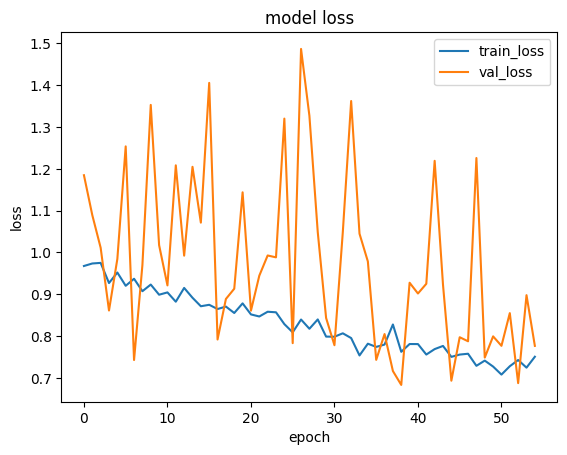

In [33]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss','val_loss'])
plt.show()

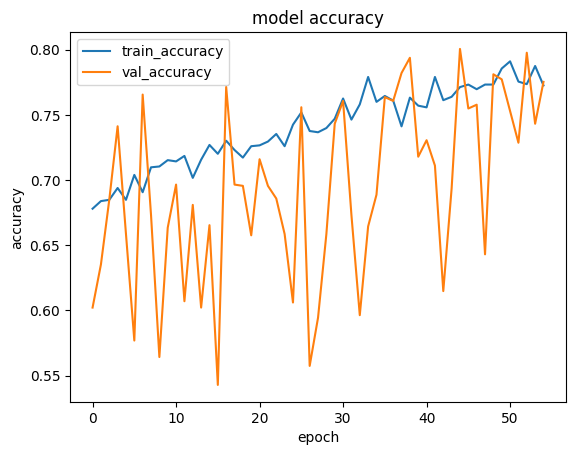

In [34]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_accuracy','val_accuracy'])
plt.show()

In [35]:
model.evaluate(testing_datset)

33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.7681 - loss: 0.8057 - top_k_accuracy: 0.9256


[0.7816576957702637, 0.7704280018806458, 0.9192606806755066]

In [ ]:
import os

data_dir = 'C:/Users/tarik/Downloads/Teeth DataSet'
categories = [d for d in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, d))]
print(f"Detected categories: {categories}")
print(f"Number of detected categories: {len(categories)}")


Detected categories: ['Teeth_Dataset']
Number of detected categories: 1


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    'C:/Users/tarik/Downloads/Teeth DataSet',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')


Found 5143 images belonging to 1 classes.


In [ ]:
print(f"Number of classes: {train_generator.num_classes}")
print(f"Class indices: {train_generator.class_indices}")
print(f"Batch size: {train_generator.batch_size}")
print(f"Image size: {train_generator.image_shape}")


Number of classes: 1
Class indices: {'Teeth_Dataset': 0}
Batch size: 32
Image size: (224, 224, 3)


In [ ]:
images = {}

for subfolder_name in os.listdir(main_folder_path):
    subfolder_path = os.path.join(main_folder_path, subfolder_name)

    if os.path.isdir(subfolder_path):
        images[subfolder_name] = []

        for image_name in os.listdir(subfolder_path):
            image_path = os.path.join(subfolder_path, image_name)

            image = cv2.imread(image_path)

            if image is not None:
                images[subfolder_name].append(image)






In [ ]:
images

{'Teeth_Dataset': []}